### Task: You will use the Iris diabetes dataset. The dataset corresponds to a clustering problem on
### which you need to make predictions based on given the 3 iris species with 50 samples each, as well
### as some properties about each flower in the dataset. You are asked to predict the classes of flowers
### by using K-means and Hierarchical Clustering methods


In [67]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap


import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, normalize, RobustScaler

from sklearn.cluster import KMeans,DBSCAN,AgglomerativeClustering
from sklearn.metrics import silhouette_samples, silhouette_score

import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import linkage, dendrogram

from sklearn.decomposition import PCA

from sklearn.metrics import silhouette_score
from sklearn.metrics import confusion_matrix

warnings.filterwarnings("ignore")

In [69]:
df=pd.read_csv('C:\\Users\\Yusif\\Downloads\\Iris1.csv')

In [70]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [75]:
df.set_index('Id',inplace=True)

In [77]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [79]:
df.nunique()

SepalLengthCm    35
SepalWidthCm     23
PetalLengthCm    43
PetalWidthCm     22
Species           3
dtype: int64

In [81]:
df.isna().sum().sum()

0

In [83]:
df_corr=df.drop(['Species'],axis=1)

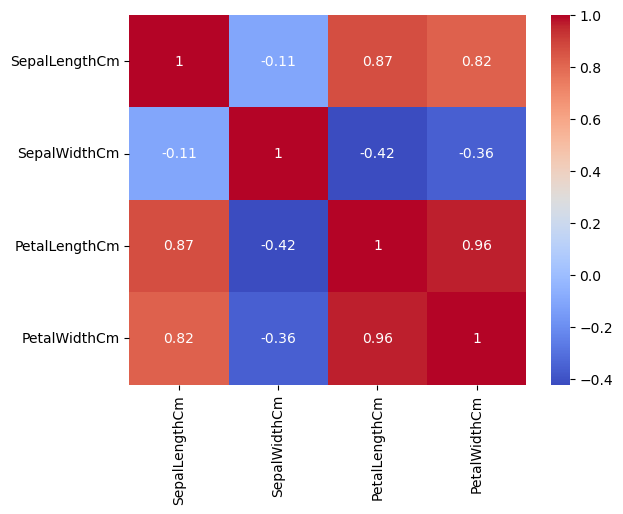

In [85]:
sns.heatmap(df_corr.corr(), annot=True, cmap="coolwarm")
plt.show()

In [86]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica


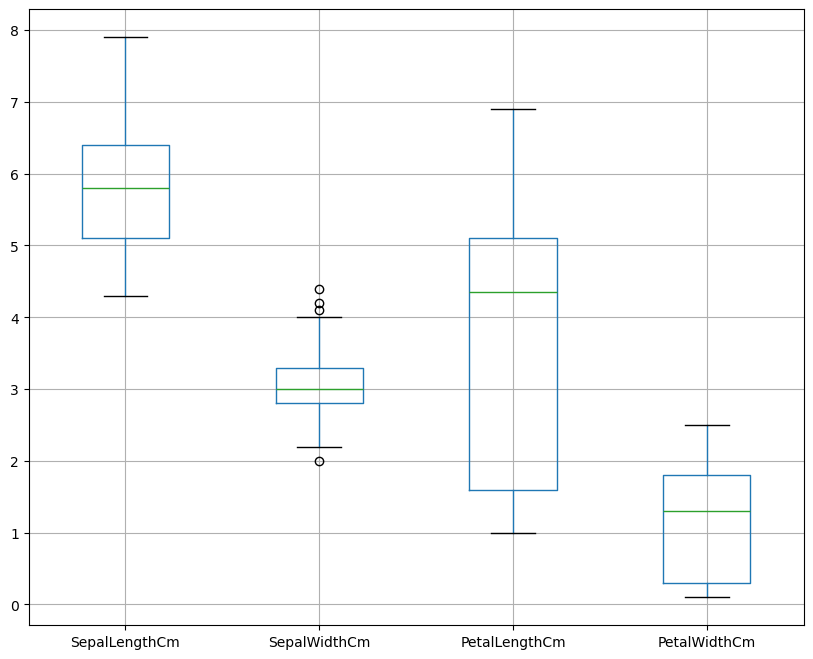

In [87]:
plt.figure(figsize=[10,8])
df.boxplot()
plt.show()

In [90]:
df1=df.drop(['Species'],axis=1)

In [92]:
scaler=RobustScaler()
df1=pd.DataFrame(scaler.fit_transform(df1), columns=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'])
df1

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-0.538462,1.0,-0.842857,-0.733333
1,-0.692308,0.0,-0.842857,-0.733333
2,-0.846154,0.4,-0.871429,-0.733333
3,-0.923077,0.2,-0.814286,-0.733333
4,-0.615385,1.2,-0.842857,-0.733333
...,...,...,...,...
145,0.692308,0.0,0.242857,0.666667
146,0.384615,-1.0,0.185714,0.400000
147,0.538462,0.0,0.242857,0.466667
148,0.307692,0.8,0.300000,0.666667


In [95]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['KMeans'] = kmeans.fit_predict(df1)

In [97]:
hc=AgglomerativeClustering(n_clusters=3)
y_hc=hc.fit_predict(df1)
df['Hierarchical']=y_hc

In [99]:
dbscan = DBSCAN(eps=0.5, min_samples=3)  
dbs = dbscan.fit_predict(df1)
df['dbscan']=dbs

In [102]:
kmeans_labels =kmeans.labels_
agg_labels = hc.labels_
dbscan_labels = dbscan.labels_

In [104]:
print("K-means Silhouette Score:", silhouette_score(df1, kmeans_labels))
print("Agglomerative Clustering Silhouette Score:", silhouette_score(df1, agg_labels))
print("DBSCAN Silhouette Score:", silhouette_score(df1, dbscan_labels))

K-means Silhouette Score: 0.4418447521852928
Agglomerative Clustering Silhouette Score: 0.4460492732953357
DBSCAN Silhouette Score: 0.49232214612083186


In [107]:
df['KMeans']=df['KMeans'].replace({2:'Iris-setosa',1:'Iris-versicolor',0:'Iris-virginica'})
df['Hierarchical']=df['Hierarchical'].replace({0:'Iris-setosa',1:'Iris-versicolor',2:'Iris-virginica'})
df['dbscan']=df['dbscan'].replace({0:'Iris-setosa',2:'Iris-versicolor',1:'Iris-virginica'})

In [109]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,KMeans,Hierarchical,dbscan
Id,,,,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa
...,...,...,...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica,Iris-virginica,Iris-virginica,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica,Iris-versicolor,Iris-versicolor,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica,Iris-virginica,Iris-virginica,Iris-virginica
